# Métodos de optimizción basados en gradiente

El gradiente descendiente es el método estándar para realizar optimización de los pesos en una red neuronal. Pero existen diferentes formas de implementar esta optimización, como por ejemplo: Sotchastic Gradient Descent (SGD), Batch Gradient Descent o Mini-batch Gradient Descent. 

Una parte importante del método de gradiente descendiente es la elección de rango de aprendizaje. Existen métodos que buscan estimar un rango de aprendizaje que pueda permitir una convergencia de los pesos de la red adecuada. Aquí exploramos dos de estos métodos: 1) Adagrad y 2) Adam. Además comparamos con un grdiente descendiente stocástico.

In [2]:
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Datos de entrenamiento

elegimos una tarea de clasificiación binaria simple:

In [3]:
#Abrir los datos
data = pd.read_csv('cat_data.csv')
data

,¿es animal?,¿es mamífero?,¿es felino?,¿es doméstico?,¿tiene dos orejas?,¿es negro?,¿tiene cuatro patas?,¿es gato?
0,1,1,1,1,1,1,1,1
1,0,0,0,1,0,1,0,0
2,1,0,1,0,0,1,1,0
3,1,0,0,0,1,0,1,0
4,1,0,1,0,1,0,1,0
5,1,1,1,1,0,0,0,1
6,1,0,0,1,1,1,0,0
7,1,1,1,1,0,0,1,1
8,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0


In [4]:
#Convertir los datos a numpy
npData = data.to_numpy()
#Ejemplos
X = npData[:,:-1]
#Clases de los ejemplos
Y = npData[:,-1]

#Tamaño de los datos
#Unidades de entrada
N,d = X.shape

print('Número de vectores de entrenamiento: {}, con dimensión: {}'.format(N,d))

Número de vectores de entrenamiento: 24, con dimensión: 7


Visualizamos los datos en dos dimensiones:

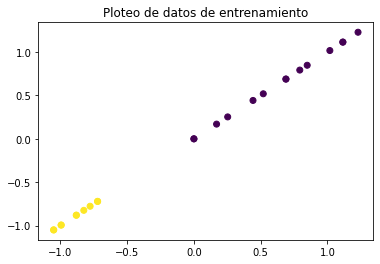

In [5]:
#Reducción de dimensionalidad
X_plot = PCA(2).fit_transform(X)
#Visualización
plt.scatter(X_plot[:,0],X_plot[:,0], c=Y)
plt.title('Ploteo de datos de entrenamiento')
plt.show()

Una vez preparados los datos de entrenamiento, procedemos a estimar los pesos de la red; para esto, utilizamos en primer lugrar SGD.

# SGD

En el SGD se tiene que:

* Se actualizan los pesos cada vez que se observa un ejemplo. 
* El rango de aprendizaje es un hiperparámetro fijo, esto es, no varía durante el entrenamiento.

In [6]:
%%time

#Inicializar pesos
np.random.seed(0)
h_dim = 3
W1 = np.random.rand(h_dim,d)/np.sqrt(d)
b1 = np.ones(h_dim)
W2 = np.random.rand(2,h_dim)/np.sqrt(h_dim)
b2 = np.ones(2)

#Hiperparámetros
its = 1000
eta = 1

t = 0
stop = False
while stop == False:
    error = 0
    for x,y in zip(X,Y):
        #FORWARD
        a1 = np.dot(W1,x)+b1
        h = np.tanh(a1)
        a2 = np.dot(W2,h)+b2
        exp = np.exp(a2)
        f = exp/exp.sum(0)
        
        #BACKWARD
        d_out = exp/exp.sum(0)
        d_out[y] -= 1
        
        d_h = (1-h**2)*np.dot(W2.T,d_out)        

        DW2 = np.outer(d_out,h)
        Db2 = d_out
        
        DW1 = np.outer(d_h,x)
        Db1 = d_h
        
        #Actualización de pesos
        #El rango de aprendizaje es fijo
        W2 -= eta*DW2
        b2 -= eta*Db2
        W1 -= eta*DW1
        b1 -= eta*Db1
        
        #Error cuadrático
        error += (np.argmax(f)-y)**2
        
    t += 1
    print('Error en iteración {}: {}'.format(t,error))
    #Condición de finalización
    if error == 0 or t == its:
        stop = True
    

Error en iteración 1: 10
Error en iteración 2: 2
Error en iteración 3: 2
Error en iteración 4: 6
Error en iteración 5: 0
CPU times: user 9.96 ms, sys: 4.99 ms, total: 15 ms
Wall time: 11.4 ms


Podemos definir una función forward para observar el resultado de la red con los pesos aprendidos.

In [7]:
def forward(X):
    a1 = np.dot(X,W1.T)+b1
    h = np.tanh(a1)
    a2 = np.dot(h,W2.T)+b2
    exp = np.exp(a2)
    f = exp/exp.sum(1, keepdims=True)
    
    return f

print(classification_report(np.argmax(forward(X), axis=1),Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



## ADAGRAD

El método de Adagrad se basa en el SGD, pero aquí el rango de aprendizaje varía, y las actualizaciones se realizan según la regla:

$$\theta_i \leftarrow \theta_i - \frac{\eta}{\sqrt{\mu}+\epsilon} \nabla_{\theta_i} R(\theta)$$

Donde $\mu$ es un parámetro que varía según la siguiente regla:

$$\mu \leftarrow \mu + [\nabla_{\theta_i} R(\theta)]^2$$

In [8]:
%%time
#Inicializar pesos
np.random.seed(0)
h_dim = 3
W1 = np.random.rand(h_dim,d)/np.sqrt(d)
b1 = np.ones(h_dim)
W2 = np.random.rand(2,h_dim)/np.sqrt(h_dim)
b2 = np.ones(2)

#Hiperparámetros
its = 1000

#Rango de aprendizahe inicial
eta = 1
#Epsilon
eps = 1e-8
#Inicialización del parámetro mu
#Se utiliza uno para cada matriz de pesos
mu1 = 0
mub1 = 0
mu2 = 0
mub2 = 0

t = 0
stop = False
while stop == False:
    error = 0
    for x,y in zip(X,Y):
        #FORWARD
        a1 = np.dot(W1,x)+b1
        h = np.tanh(a1)
        a2 = np.dot(W2,h)+b2
        exp = np.exp(a2)
        f = exp/exp.sum(0)
        
        #BACKWARD
        d_out = exp/exp.sum(0)
        d_out[y] -= 1
        d_h = (1-h**2)*np.dot(W2.T,d_out)        

        #Derivadas
        DW2 = np.outer(d_out,h)
        Db2 = d_out
        DW1 = np.outer(d_h,x)
        Db1 = d_h
        
        #ADAGRAD
        #Actualizació de mu
        mu1 += DW1**2
        mub1 += Db1**2
        mu2 += DW2**2
        mub2 += Db2**2
        
        #Cada matriz de pesos se actualiza por Adagrad
        W2 -= (eta/(np.sqrt(mu2)+eps))*DW2
        b2 -= (eta/(np.sqrt(mub2)+eps))*Db2
        W1 -= (eta/(np.sqrt(mu1)+eps))*DW1
        b1 -= (eta/(np.sqrt(mub1)+eps))*Db1
        
        #Error cuadrático
        error += (np.argmax(f)-y)**2
        
    t += 1
    print('Error en iteración {}: {}'.format(t,error))
    #Condición de paro
    if error == 0 or t == its:
        stop = True

Error en iteración 1: 10
Error en iteración 2: 0
CPU times: user 24.9 ms, sys: 0 ns, total: 24.9 ms
Wall time: 22.1 ms


In [10]:
def forward(X):
    a1 = np.dot(X,W1.T)+b1
    h = np.tanh(a1)
    a2 = np.dot(h,W2.T)+b2
    exp = np.exp(a2)
    f = exp/exp.sum(1, keepdims=True)
    
    return f

print(classification_report(np.argmax(forward(X), axis=1),Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



## ADAM

Es un método basado en SGD, pero donde el rango de aprendizaje y los valores de cambio varían, siendo que la actualización de los pesos de la red se actualizan por medio de la regla:

$$\theta_i \leftarrow \theta_i - \frac{\eta}{\sqrt{\hat{\nu}} + \epsilon} \hat{m}$$

Donde:

$$\hat{m} = \frac{m}{1-\beta_1}$$

y:

$$\hat{\nu} = \frac{\nu}{1-\beta_2}$$

Tal que $m$ es un parámetro que se actualiza como:

$$m \leftarrow \beta_1 m + (1-\beta_1) \nabla_\theta R(\theta)$$

Mientras que $\nu$ es actualizado como:

$$\nu \leftarrow \beta_2 \nu + (1-\beta_2) [\nabla_\theta R(\theta)]^2$$

Aquí, $\beta_1, \beta_2\in [0,1]$ son dos hiperparámetros.

In [11]:
%%time
#Inicializar pesos
np.random.seed(0)
h_dim = 3
W1 = np.random.rand(h_dim,d)/np.sqrt(d)
b1 = np.ones(h_dim)
W2 = np.random.rand(2,h_dim)/np.sqrt(h_dim)
b2 = np.ones(2)

#Hiperparámetros
#Núm de iteraciones
its = 1000

#Para ADAM
#Rango de aprendizaje inicial
eta = 1
#Epsilón
eps = 1e-8
#hiperparámetros beta1 y beta2
beta1 = 0.0009
beta2 = 0.0009
#Inicialización de m y nu
#Se tiene uno por cada matriz de pesos
m1 = 0
mb1 = 0
m2 = 0
mb2 = 0
v1 = 0
vb1 = 0
v2 = 0
vb2 = 0

t = 0
stop = False
while stop == False:
    error = 0
    for x,y in zip(X,Y):
        #FORWARD
        a1 = np.dot(W1,x)+b1
        h = np.tanh(a1)
        a2 = np.dot(W2,h)+b2
        exp = np.exp(a2)
        f = exp/exp.sum(0)
        
        #BACKWARD
        d_out = exp/exp.sum(0)
        d_out[y] -= 1
        d_h = (1-h**2)*np.dot(W2.T,d_out)        

        #Derivadas
        DW2 = np.outer(d_out,h)
        Db2 = d_out
        DW1 = np.outer(d_h,x)
        Db1 = d_h
        
        #ADAM
        #Actualización Primer momento
        m1 = beta1*m1 + (1-beta1)*DW1
        mb1 = beta1*mb1 + (1-beta1)*Db1
        m2 = beta1*m2 + (1-beta1)*DW2
        mb2 = beta1*mb2 + (1-beta1)*Db2
        #Actualización Segundo momento
        v1 = beta2*v1 + (1-beta2)*DW1**2
        vb1 = beta2*vb1 + (1-beta2)*Db1**2
        v2 = beta2*v2 + (1-beta2)*DW2**2
        vb2 = beta2*vb2 + (1-beta2)*Db2**2
        
        #Ponderación m
        m1_p = m1/(1-beta1)
        mb1_p = mb1/(1-beta1)
        m2_p = m2/(1-beta1)
        mb2_p = mb2/(1-beta1)
        #Ponderación nu
        v1_p = v1/(1-beta2)
        vb1_p = vb1/(1-beta2)
        v2_p = v2/(1-beta2)
        vb2_p = vb2/(1-beta2)
        
        #Actualización de pesos con ADAM
        W2 -= (eta/(np.sqrt(v2_p)+eps))*m2_p
        b2 -= (eta/(np.sqrt(vb2_p)+eps))*mb2_p
        W1 -= (eta/(np.sqrt(v1_p)+eps))*m1_p
        b1 -= (eta/(np.sqrt(vb1_p)+eps))*mb1_p
        
        #Error cuadrático
        error += (np.argmax(f)-y)**2
        
    t += 1
    print('Error en iteración {}: {}'.format(t,error))
    #Condición de paro
    if error == 0 or t == its:
        stop = True

Error en iteración 1: 6
Error en iteración 2: 2
Error en iteración 3: 0
CPU times: user 18.4 ms, sys: 0 ns, total: 18.4 ms
Wall time: 14.4 ms


In [12]:
def forward(X):
    a1 = np.dot(X,W1.T)+b1
    h = np.tanh(a1)
    a2 = np.dot(h,W2.T)+b2
    exp = np.exp(a2)
    f = exp/exp.sum(1, keepdims=True)
    
    return f

print(classification_report(np.argmax(forward(X), axis=1),Y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

